In [27]:
import numpy as np
import pandas as pd
import time
# For plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#PCA
from sklearn.decomposition import PCA

In [28]:
train = pd.read_csv('sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [29]:
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [30]:
#Appling PCA
start = time.time()
pca = PCA(n_components=3)
print("Chiều dữ liệu ban đầu: ", x.shape)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
print("Chiều sau khi áp dụng PCA:", principal.shape)
#principal.shape

Chiều dữ liệu ban đầu:  (7172, 784)
Duration: 0.8396954536437988 seconds
Chiều sau khi áp dụng PCA: (7172, 3)


Text(0,0.5,'Principal Component 2')

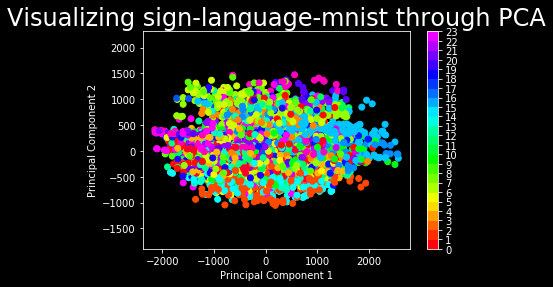

In [31]:
# Plotting PCA 2D
plt.style.use('dark_background')
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
plt.title('Visualizing sign-language-mnist through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

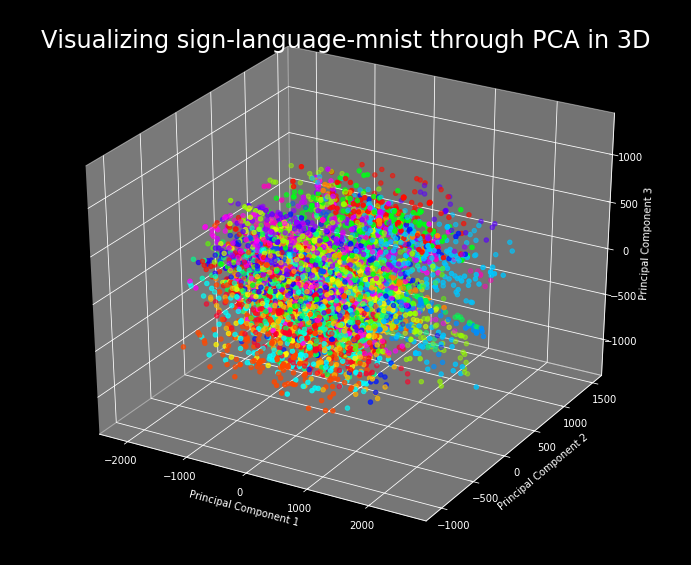

In [32]:
# Plotting PCA 3D
ax = plt.figure(figsize=(12,10)).gca(projection='3d')
ax.scatter(
    xs=principalComponents[:, 0], 
    ys=principalComponents[:, 1], 
    zs=principalComponents[:, 2], 
    c=y, 
    cmap='gist_rainbow'
)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Visualizing sign-language-mnist through PCA in 3D', fontsize=24);
plt.show()